In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('/content/usa_rain_prediction_dataset_2024_2025.csv')

In [71]:
#data overview
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [72]:
df.shape

(73100, 9)

In [73]:
df.isnull().sum()

,0
Date,0
Location,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation,0
Cloud Cover,0
Pressure,0
Rain Tomorrow,0


In [74]:
df.duplicated().sum()

0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [76]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [77]:
# Visualization

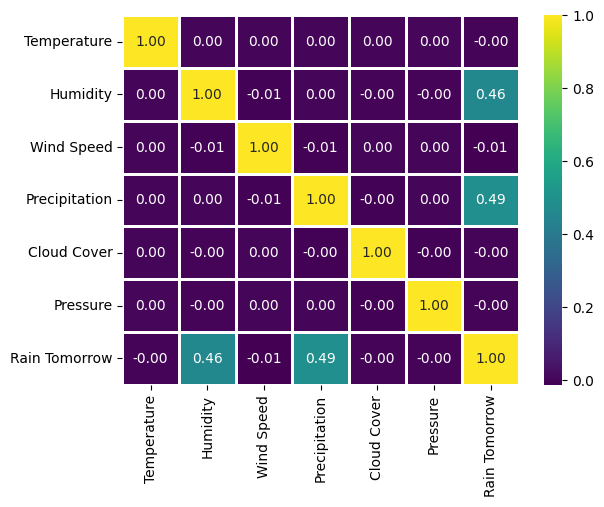

In [78]:
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt = '.2f', cmap = 'viridis', linewidths = 2)
plt.show()

In [79]:
# Humidity and Precipitation shows a positive correlation.

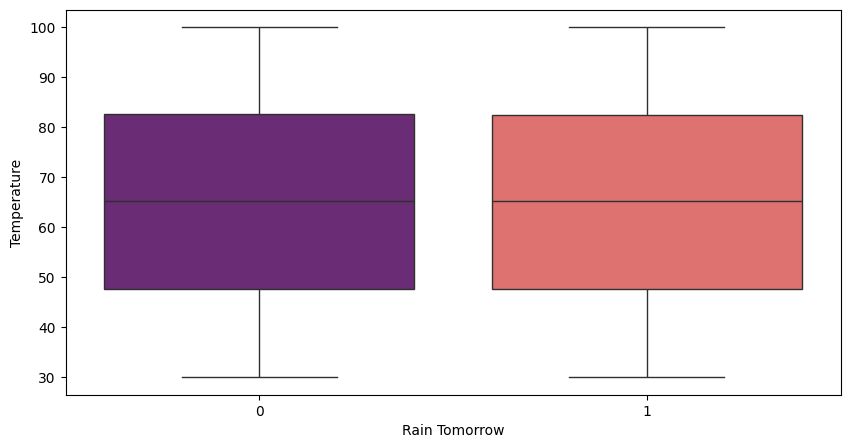

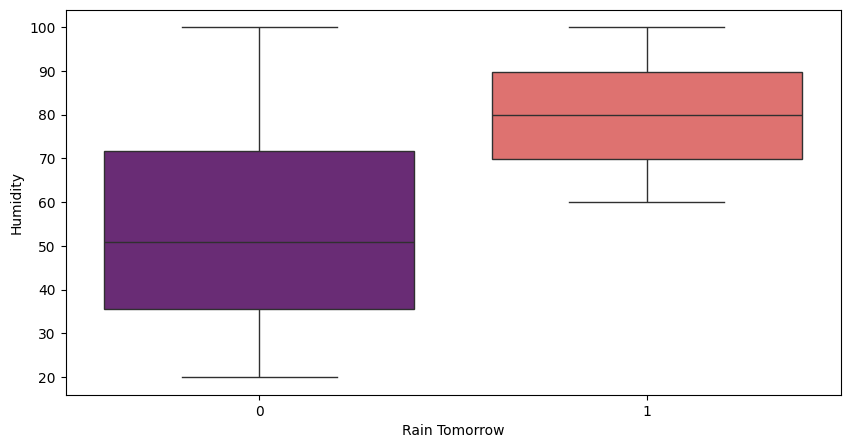

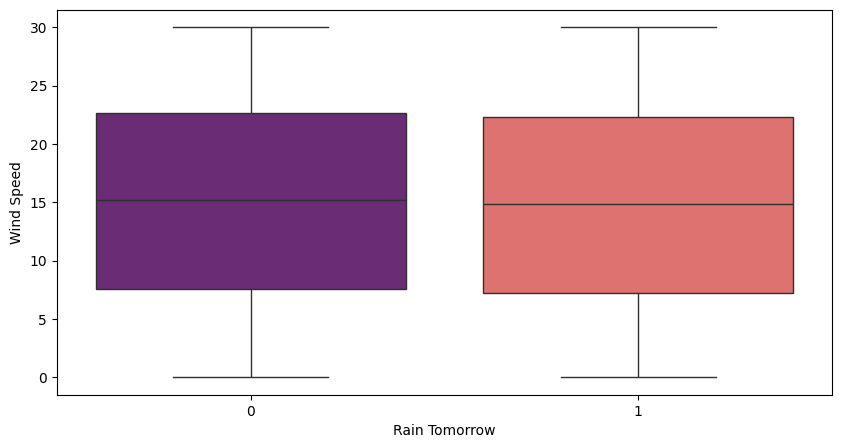

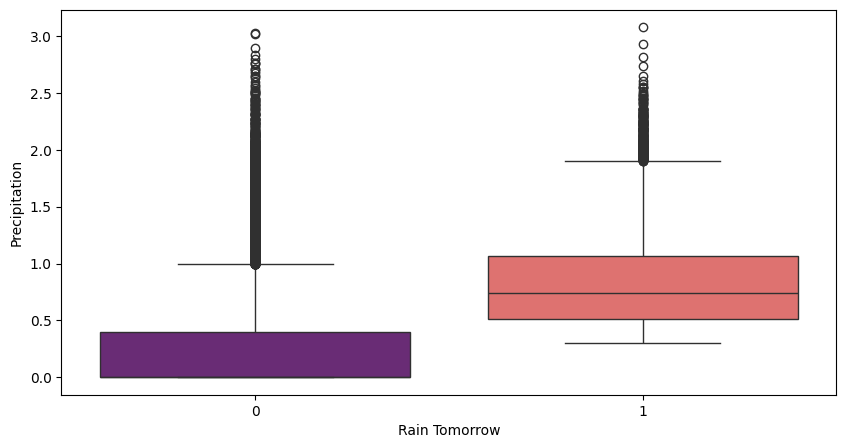

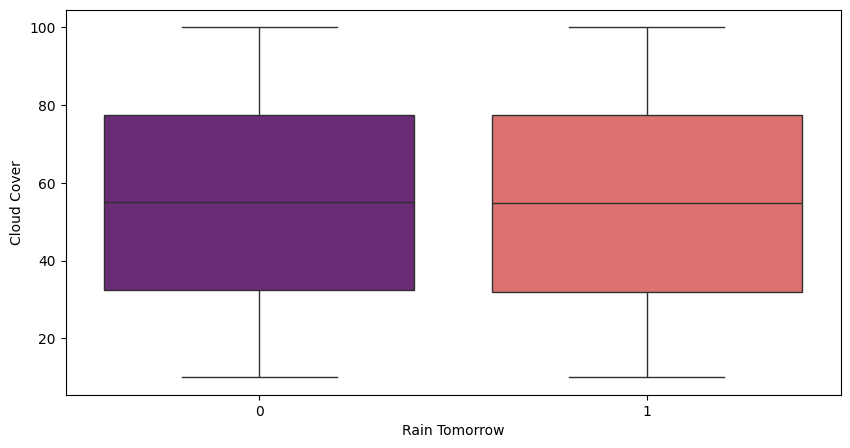

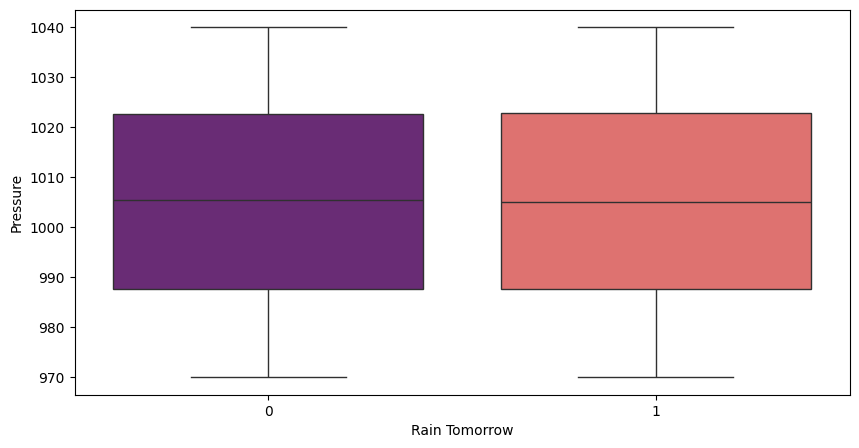

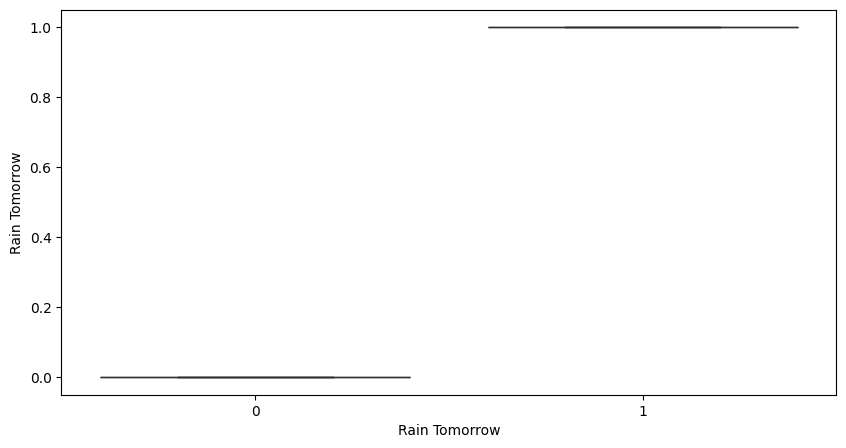

In [80]:
df_num = df.select_dtypes(exclude = 'object')
for col in df_num.columns:
  plt.figure(figsize = (10, 5))
  sns.boxplot(y = col, data = df, x = 'Rain Tomorrow', palette = 'magma')
  plt.show()

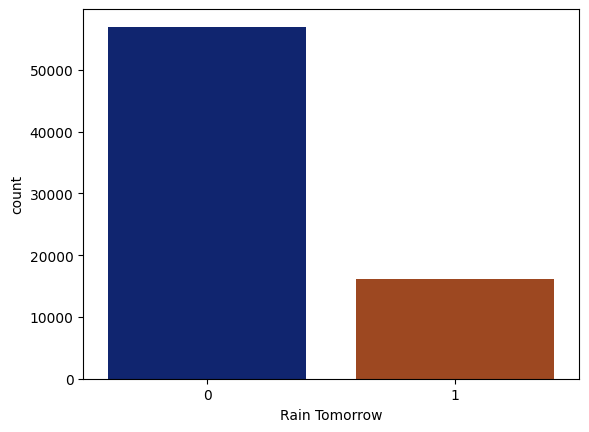

In [81]:
sns.countplot(data = df, x = 'Rain Tomorrow', palette = 'dark')
plt.show()

In [82]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [83]:
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Year,Month,Day
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,2024,1,1
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,2024,1,2
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1,2024,1,3
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,2024,1,4
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,2024,1,5


In [84]:
df1 = df.groupby('Year')['Rain Tomorrow'].value_counts().reset_index(name = 'Count')

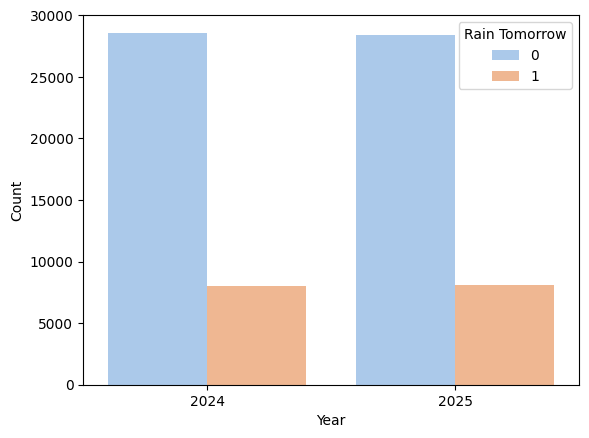

In [85]:
sns.barplot(data = df1, x = 'Year', y = 'Count', hue = 'Rain Tomorrow', palette='pastel')
plt.show()

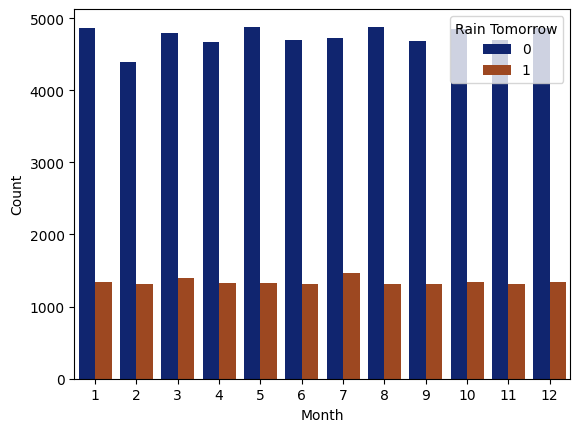

In [86]:
df2 = df.groupby('Month')['Rain Tomorrow'].value_counts().reset_index(name = 'Count')
sns.barplot(data = df2, x = 'Month', y = 'Count', hue = 'Rain Tomorrow', palette='dark')
plt.show()

In [87]:
df.groupby('Month')['Humidity'].mean().sort_values(ascending = False)

,Humidity
Month,
1,60.183286
3,60.176035
7,60.068153
6,59.969817
11,59.959639
4,59.959104
12,59.817555
2,59.807880
5,59.738654


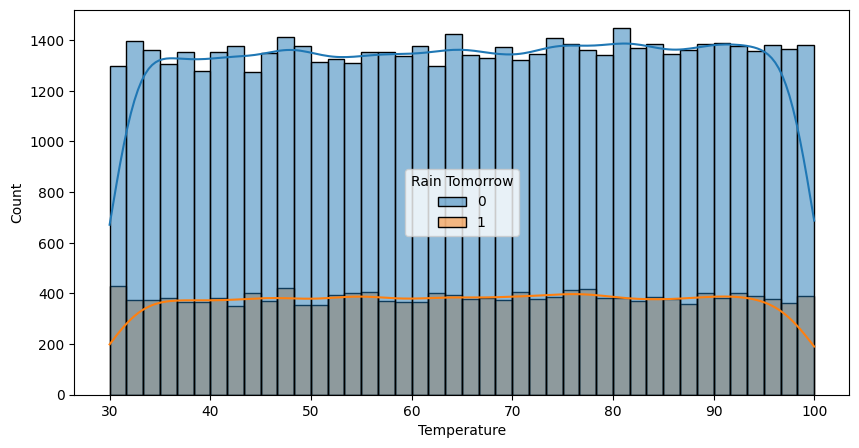

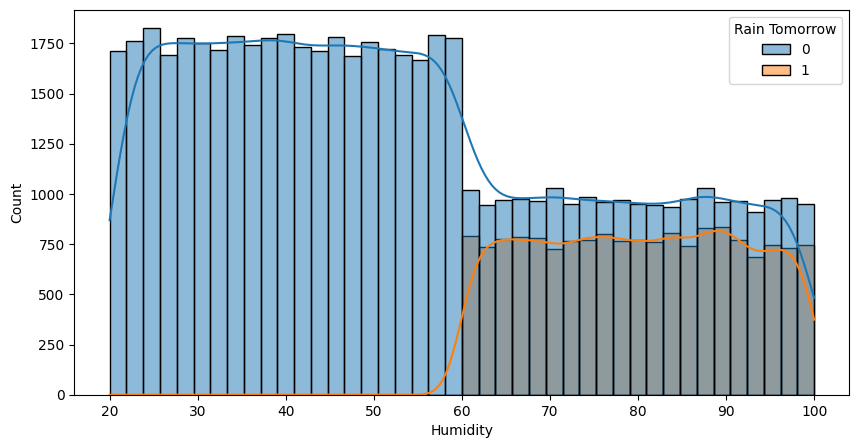

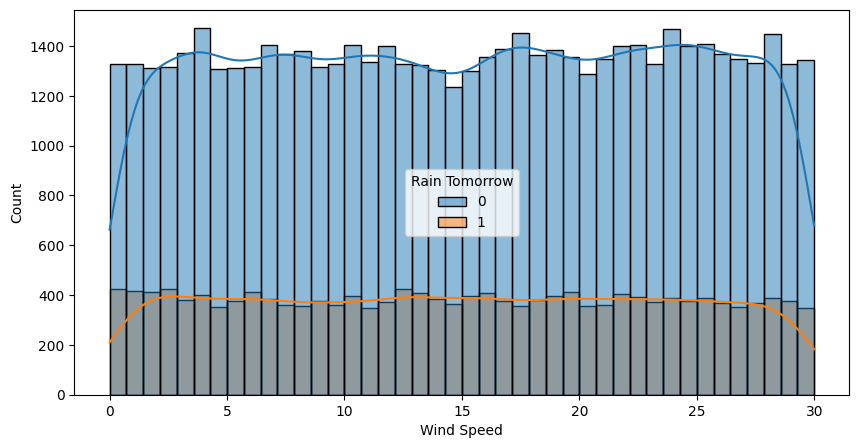

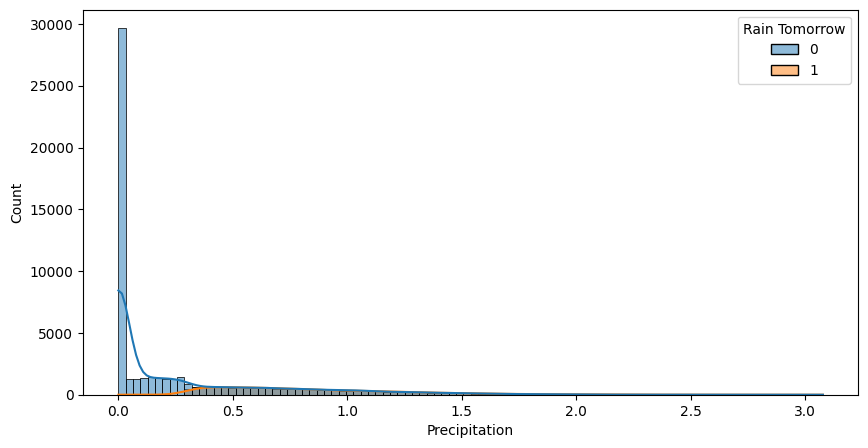

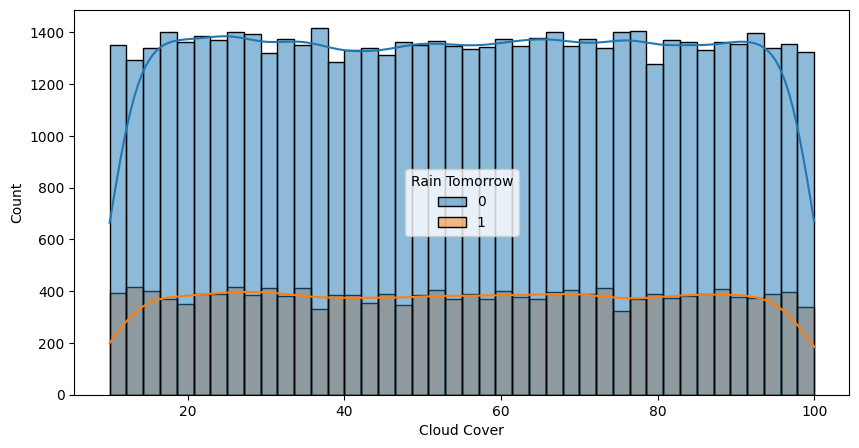

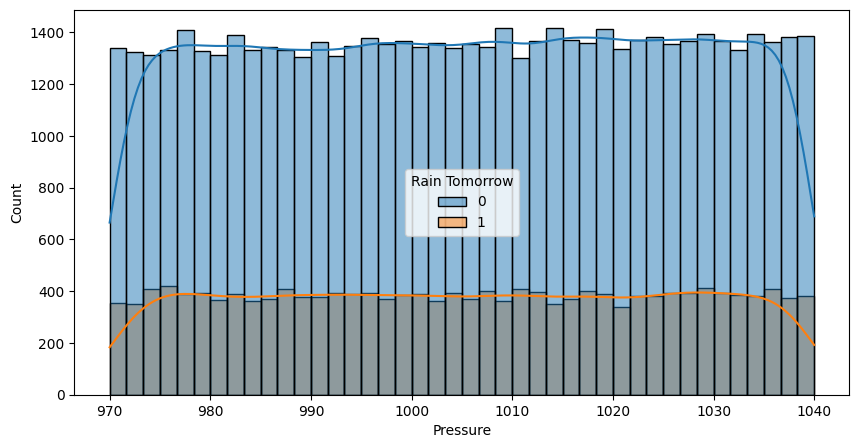

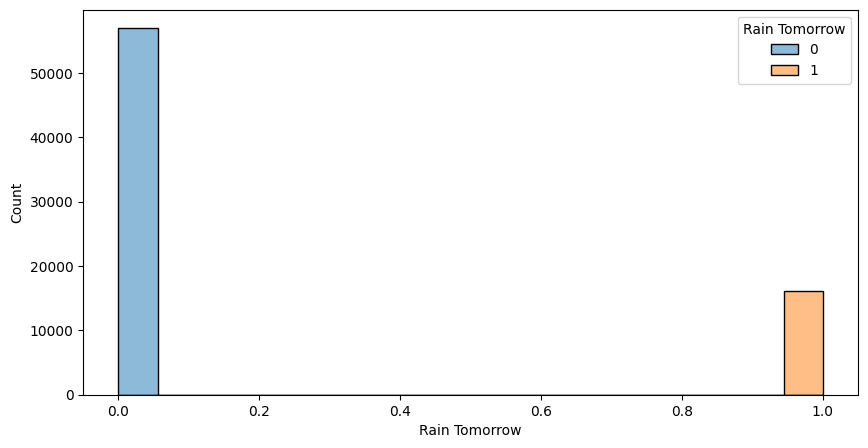

In [88]:
for col in df_num.columns:
  plt.figure(figsize = (10, 5))
  sns.histplot(data = df, x = col, hue = 'Rain Tomorrow', kde = True)
  plt.show()

In [89]:
# Building the ML Model

In [90]:
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Year,Month,Day
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,2024,1,1
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,2024,1,2
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1,2024,1,3
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,2024,1,4
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,2024,1,5


In [91]:
df_ml = df.drop(columns = ['Date', 'Year', 'Month', 'Day','Location'], axis = 1)

In [92]:
df_ml.head()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [93]:
df_ml.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover',
       'Pressure', 'Rain Tomorrow'],
      dtype='object')

In [94]:
df_std = df_ml[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover','Pressure']]

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
scale = StandardScaler()

In [106]:

import statsmodels.formula.api as smf


In [97]:
#for col in df_std.columns:
#  df_ml[col] = scale.fit_transform(df_ml[col].values.reshape(-1, 1))

In [98]:
df_ml.head()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [99]:
x = df_ml.drop('Rain Tomorrow', axis = 1)
y = df_ml['Rain Tomorrow']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [101]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((51170, 6), (21930, 6), (51170,), (21930,))

Accuracy: 1.0


In [103]:
y_test

,Rain Tomorrow
66127,0
43485,0
34304,1
34317,0
38631,0
...,...
43174,0
61942,0
7362,0
22037,0


In [104]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [108]:
##-------------------------
##  Build the logit model
##-------------------------
import statsmodels.api as sm
##  Constant is to be added when using the sm library
x_train= sm.add_constant( x_train )
#Call Logistic regression with X and Y variables of the training data
# Model is built with the training data
logit = sm.Logit(y_train, x_train)
##  Fit the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.231178
         Iterations 9
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Rain Tomorrow    Pseudo R-squared: 0.561     
Date:               2024-10-04 19:07 AIC:              23672.7676
No. Observations:   51170            BIC:              23734.6680
Df Model:           6                Log-Likelihood:   -11829.   
Df Residuals:       51163            LL-Null:          -26945.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     9.0000           Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -11.7177   0.8342 -14.0469 0.0000 -13.3527 -10.0828
Temperature    -0.0020   0.0008  -2.4311 0.0151  -0.0036  -0.0004


In [109]:
significant_vars = logit_model.pvalues[logit_model.pvalues < 0.05].index.tolist()
# Remove the constant if it's present
print(significant_vars)

['const', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation']


In [110]:
##-------------------------------------------------------
##  Revise model to include only significant predictors
##-------------------------------------------------------
#final_logit holds the logistic regression equation aka -the model
#Only significant X-vars are used to build the predictive model
final_logit_model = sm.Logit( y_train,x_train[significant_vars] ).fit()
print(final_logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.231179
         Iterations 9
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Rain Tomorrow    Pseudo R-squared: 0.561     
Date:               2024-10-04 19:09 AIC:              23668.8987
No. Observations:   51170            BIC:              23713.1133
Df Model:           4                Log-Likelihood:   -11829.   
Df Residuals:       51165            LL-Null:          -26945.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     9.0000           Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -12.0155   0.1406 -85.4566 0.0000 -12.2911 -11.7399
Temperature    -0.0020   0.0008  -2.4308 0.0151  -0.0036  -0.0004


In [111]:
##----------------------------
##  Apply model on test data
##----------------------------
x_test=sm.add_constant(x_test)
#Make sure only the significant variables in the test data are selected
X_test_sig_vars=x_test[significant_vars]
X_test_sig_vars
y_prob=final_logit_model.predict(X_test_sig_vars)
#y_prob holds the probability values for each record in the test data

In [112]:
y_prob

,0
66127,0.007365
43485,0.201602
34304,0.642735
34317,0.291267
38631,0.140989
...,...
43174,0.810321
61942,0.006604
7362,0.005210
22037,0.098998


In [113]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})

In [114]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

       actual_Y  predicted_prob  predicted_Y
66127         0        0.007365            0
43485         0        0.201602            0
34304         1        0.642735            1
34317         0        0.291267            0
38631         0        0.140989            0


In [115]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[16466   596]
 [ 1471  3397]]


In [116]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.70
Accuracy: 0.91


In [117]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     17062
           1       0.85      0.70      0.77      4868

    accuracy                           0.91     21930
   macro avg       0.88      0.83      0.85     21930
weighted avg       0.90      0.91      0.90     21930



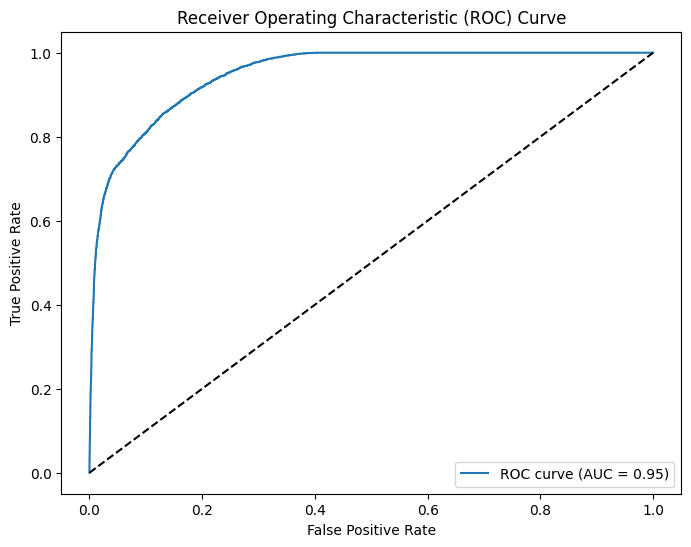

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [119]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def compute_sensitivity_table(y_actual, y_prob, specific_thresholds=np.arange(0.1, 0.5, 0.01)):
    """
    This function computes and prints a table of sensitivity (TPR) values for specified thresholds (0.1 to 0.5).

    Parameters:
    y_actual: array-like
        The actual binary labels.
    y_prob: array-like
        The predicted probabilities for the positive class.
    specific_thresholds: array-like, optional
        The specific thresholds for which to compute sensitivity. Default is np.arange(0.1, 0.5, 0.01).
    """

    results = []  # List to store results for the table

    for threshold in specific_thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        y_pred = (y_prob >= threshold).astype(int)

        # Get the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()

        # Calculate TPR (Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

        # Append results
        results.append({'Threshold': threshold, 'Sensitivity (TPR)': tpr})

    # Create a DataFrame for better formatting
    sensitivity_table = pd.DataFrame(results)

    # Print the sensitivity table
    print(sensitivity_table)

In [120]:
compute_sensitivity_table(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

    Threshold  Sensitivity (TPR)
0        0.10           0.950493
1        0.11           0.943303
2        0.12           0.936524
3        0.13           0.927691
4        0.14           0.920501
5        0.15           0.914544
6        0.16           0.907149
7        0.17           0.901602
8        0.18           0.894002
9        0.19           0.887634
10       0.20           0.880444
11       0.21           0.873665
12       0.22           0.868529
13       0.23           0.861956
14       0.24           0.857025
15       0.25           0.850863
16       0.26           0.843468
17       0.27           0.837716
18       0.28           0.830320
19       0.29           0.826007
20       0.30           0.817995
21       0.31           0.812038
22       0.32           0.807313
23       0.33           0.801561
24       0.34           0.795399
25       0.35           0.789647
26       0.36           0.782046
27       0.37           0.775267
28       0.38           0.769515
29       0